# Predictive Modeling for Breast Cancer Tumor Classification: A Comparative Analysis of Machine Learning Models
This machine learning project is about predicting the type of tumor — Malignant or Benign. The data set is of UIC machine learning data base. The columns are named as ‘id’, ‘clump thickness’, ‘uniformity of cell size’, ‘uniformity of cell shape’, ‘marginal adhesion’, ‘single epithelial cell size’, ‘bare nuclei’, ‘bland chromatin’, ‘normal nucleoli’, ‘mitosis’ and ‘class’

dataset: https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original 

|Sample code number:|            id number|
|:----:|:----:|
|Clump Thicknes  |             1 - 10|
|Uniformity of Cell Size|       1 - 10|
|Uniformity of Cell Shape|      1 - 10|
|Marginal Adhesion       |     1 - 10|
|Single Epithelial Cell Size|   1 - 10|
|Bare Nuclei                 |  1 - 10|
|Bland Chromatin              | 1 - 10|
|Normal Nucleoli              |1 - 10|
|Mitoses                    |  1 - 10|
|Class                      | (2 for benign, 4 for malignant)|

In [1]:
#importing the necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
plt.rcParams['figure.dpi'] = 300

In [2]:
#Importing the dataset 
df = pd.read_csv(r"C:\Users\Aksha\Desktop\Projects\Breast Cancer Prediction\breast_cancer.csv")
cols = df.columns

# Data Verification and Pre-Processing
## Checking the Datatypes

In [3]:
df.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

All of the columns are integer

## Checking for NULL values

In [4]:
df.isnull().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

There are no null values in the dataframe

# Checking for Outliers

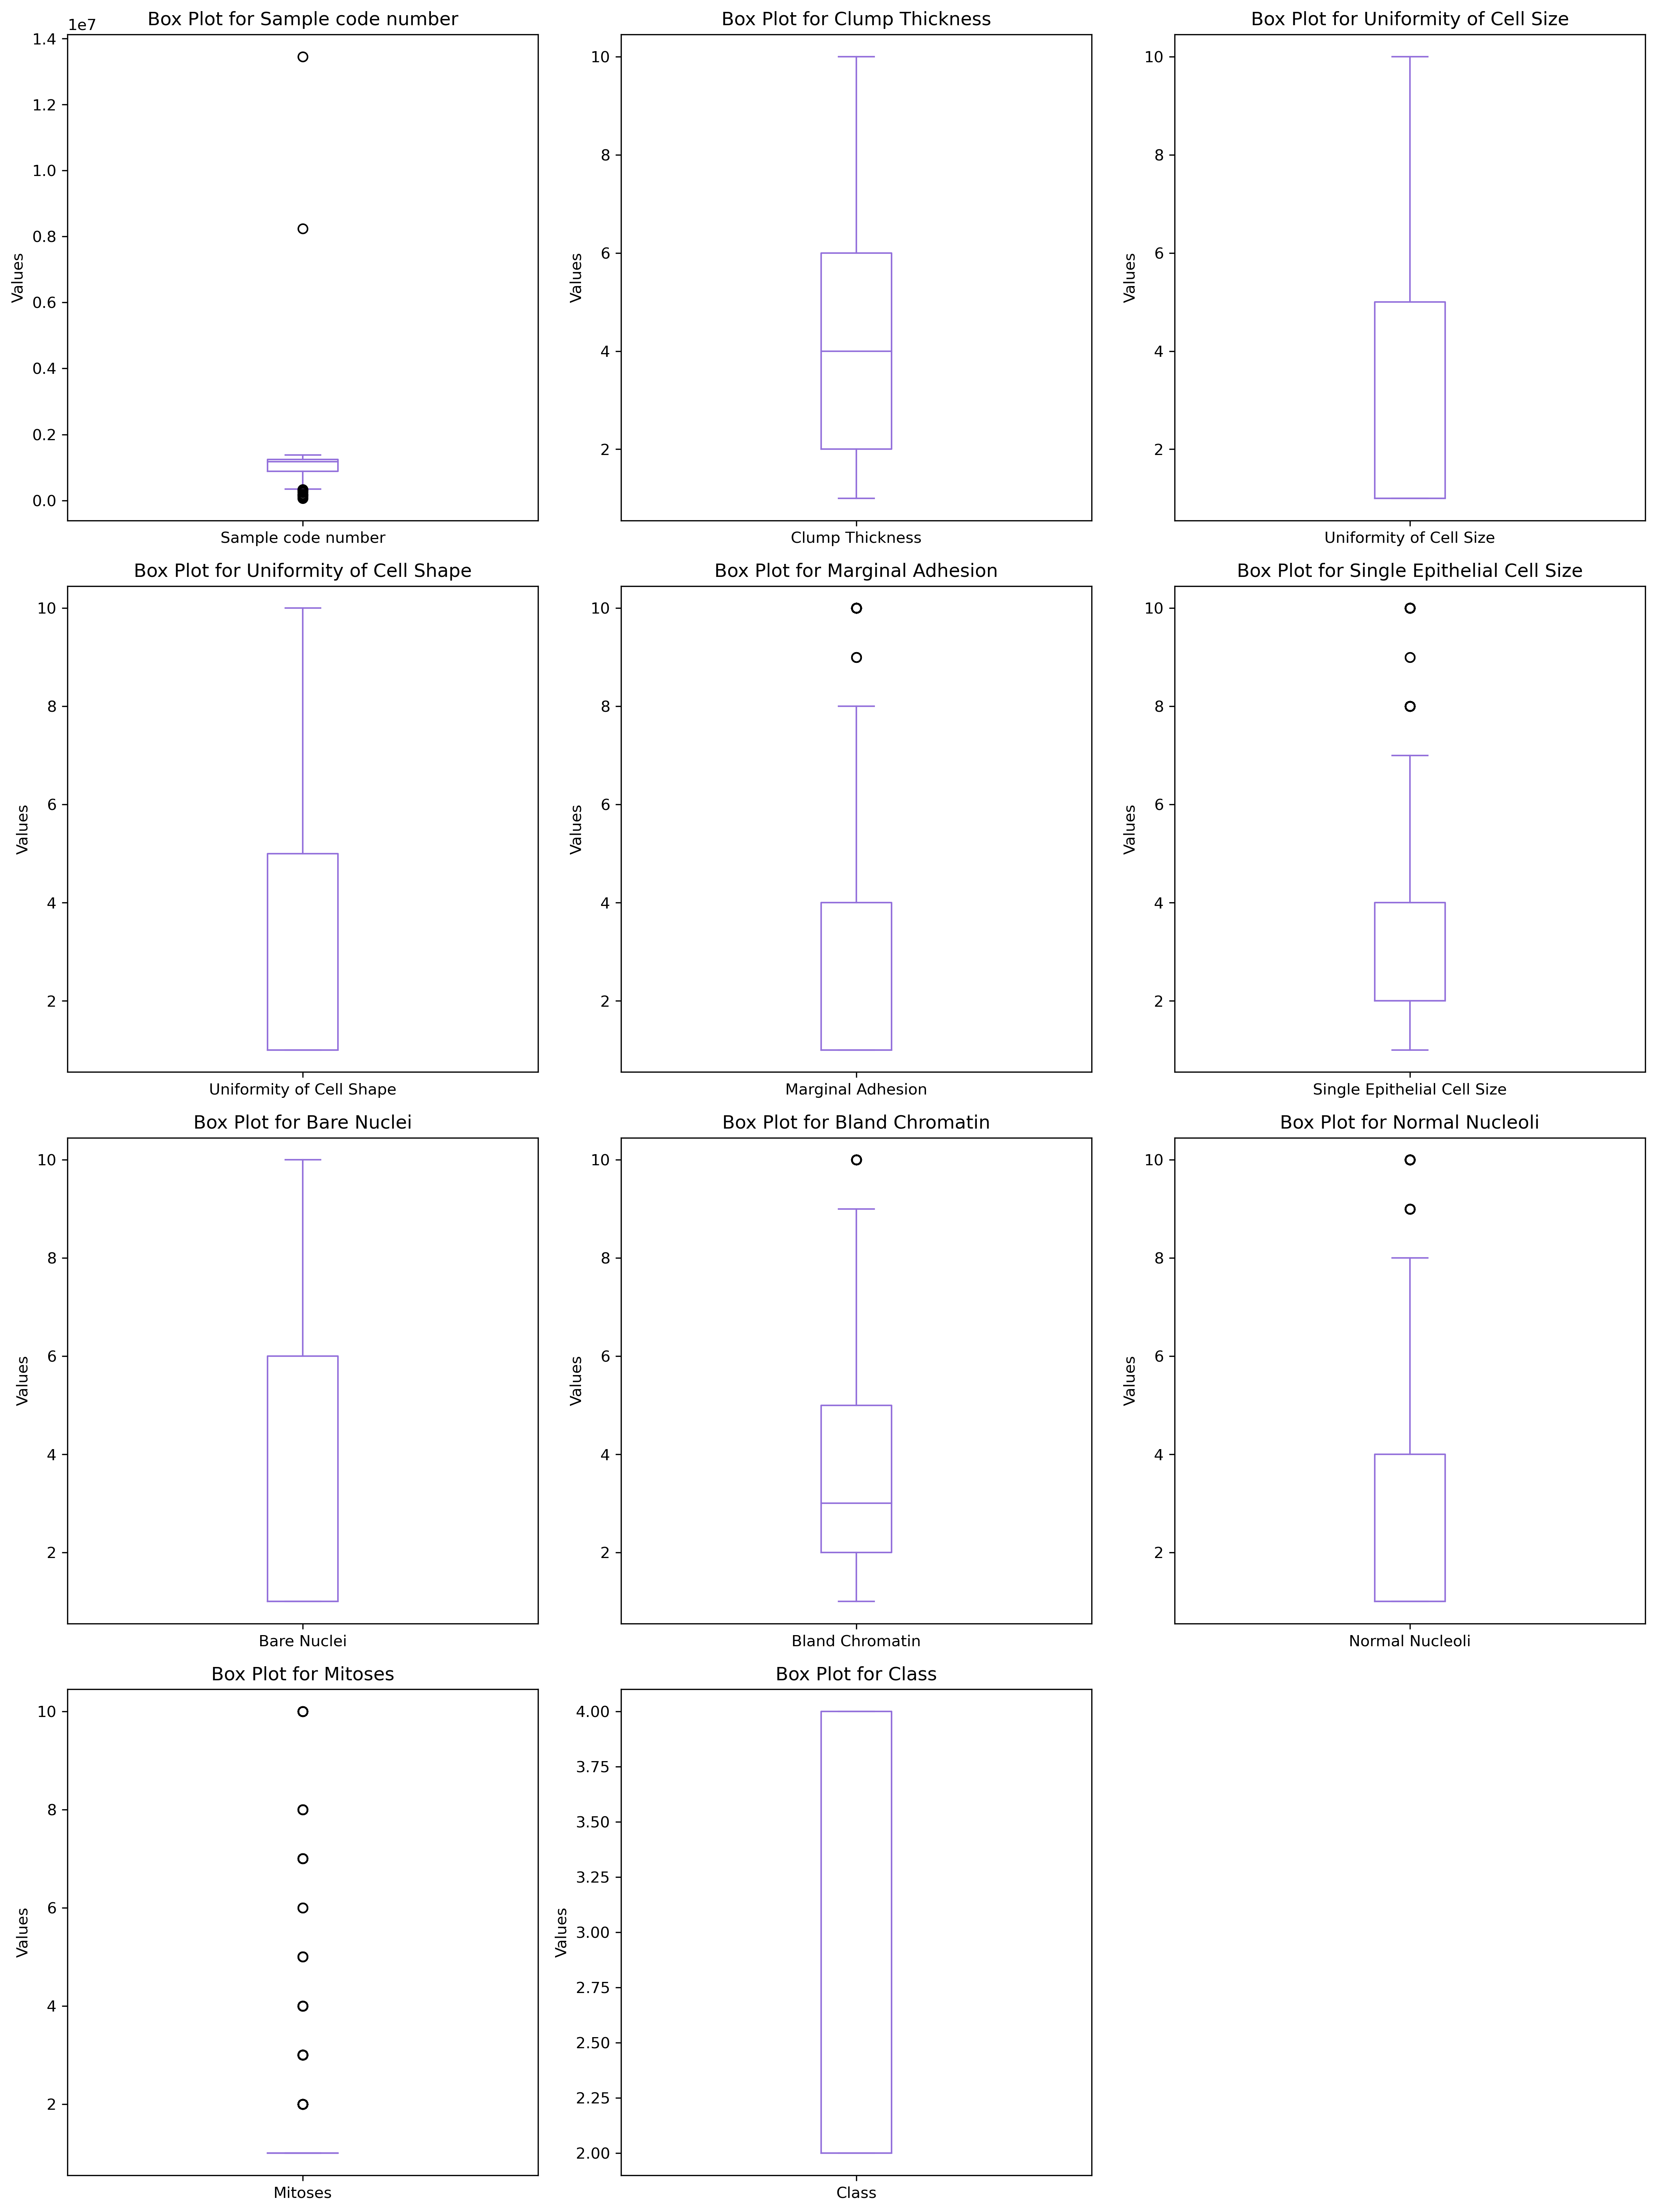

In [5]:
num_cols = 3  
num_rows = (len(df.columns) - 1) // num_cols + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
for i, col in enumerate(df.columns):
    ax = axes[i // num_cols, i % num_cols] if num_rows > 1 else axes[i % num_cols]
    df[col].plot(kind='box', ax=ax, color = "MediumPurple")
    ax.set_title(f"Box Plot for {col}")
    ax.set_ylabel("Values")
for i in range(len(df.columns), num_rows * num_cols):
    ax = axes[i // num_cols, i % num_cols] if num_rows > 1 else axes[i % num_cols]
    ax.axis('off')
plt.tight_layout()
plt.show()

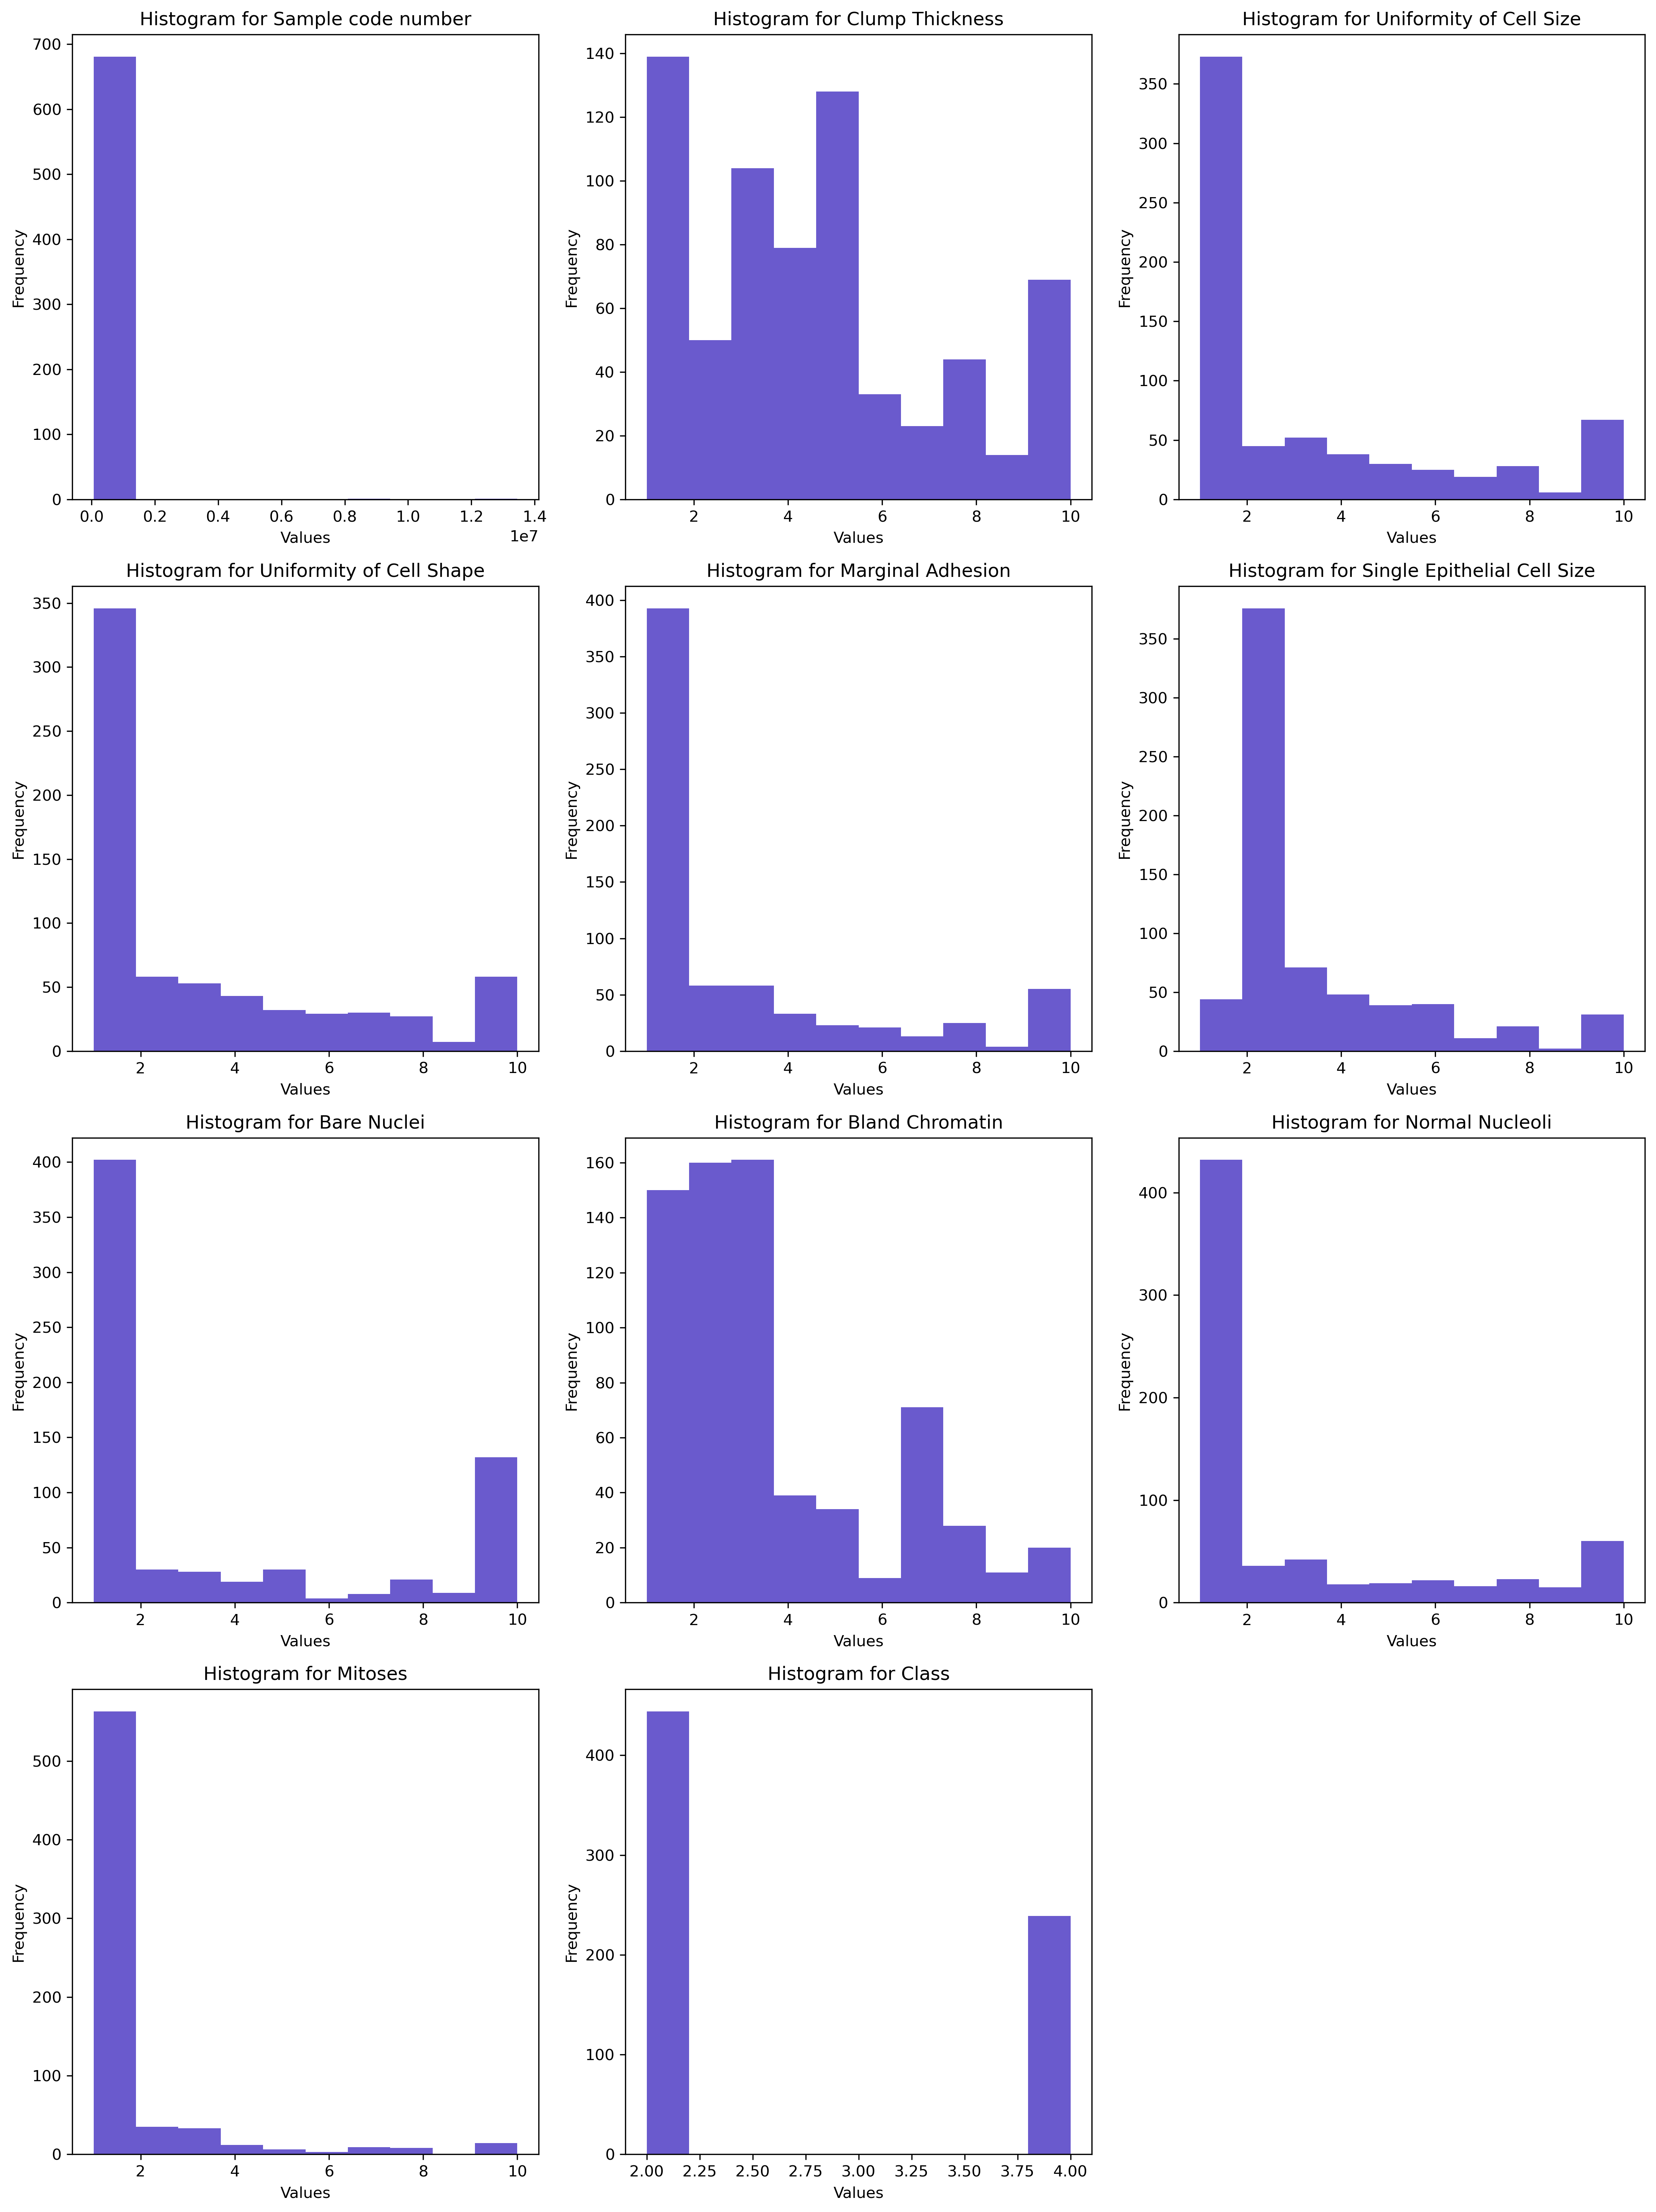

In [6]:
num_cols = 3  
num_rows = (len(df.columns) - 1) // num_cols + 1
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
for i, col in enumerate(df.columns):
    ax = axes[i // num_cols, i % num_cols] if num_rows > 1 else axes[i % num_cols]
    df[col].plot(kind='hist', ax=ax, bins=10,color='SlateBlue')
    ax.set_title(f"Histogram for {col}")
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Values")
for i in range(len(df.columns), num_rows * num_cols):
    ax = axes[i // num_cols, i % num_cols] if num_rows > 1 else axes[i % num_cols]
    ax.axis('off')

plt.tight_layout()
plt.show()

In [7]:
# Outlier Analysis
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
def count_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

outlier_counts = {}

for column in df.columns:
    outlier_counts[column] = count_outliers(column)
    
for column, count in outlier_counts.items():
    print(f"Outliers in {column}: {count}")

Outliers in Sample code number: 26
Outliers in Clump Thickness: 0
Outliers in Uniformity of Cell Size: 0
Outliers in Uniformity of Cell Shape: 0
Outliers in Marginal Adhesion: 59
Outliers in Single Epithelial Cell Size: 54
Outliers in Bare Nuclei: 0
Outliers in Bland Chromatin: 20
Outliers in Normal Nucleoli: 75
Outliers in Mitoses: 120
Outliers in Class: 0


In [8]:
df["Mitoses"].value_counts()

1     563
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: Mitoses, dtype: int64

There Appears to Be Outliers in the dataset but if we look at the Data Description Cell we can see that the value for the outliers lie within the specified limits. So we can move forward with the Outliers. 

## Defining A fucntion to display the confusion Matrix

In [9]:
def confusion(y_test,y_pred,Name):
    #Making the Confusion Matrix
    cm = confusion_matrix(y_test,y_pred)
    # Visualizing the Confusion Matrix
    class_names = [0,1] 
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names)) 
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="Purples",fmt='g') # Creating heatmap
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    temp = 'Confusion matrix for '+Name
    plt.title(temp, y = 1.1)
    plt.ylabel('Actual diagnosis')
    plt.xlabel('Predicted diagnosis')
    plt.show()
    print("The Accuracy of the",Name,"Model is:{:.2f}%".format(accuracy_score(y_test,y_pred)*100))

## Defining a function to display the Cross Valudation Accuracy

In [10]:
results = []
def cross(classifier, X_train, y_train, Name):
    accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
    accuracy_mean = accuracies.mean() * 100
    accuracy_std = accuracies.std() * 100
    
    results.append({
        'Model': Name,
        'Mean Accuracy': accuracy_mean,
        'Standard Deviation': accuracy_std
    })

    print(f"Cross Validation Score of {Name} is:")
    print(f"Accuracy: {accuracy_mean:.2f}%")
    print(f"Standard Deviation: {accuracy_std:.2f}%")

## Extracting the matrix of featues and target variable

In [11]:
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

## Utilising train_test_split to split the matrix of features and target variables into train and test sets

In [12]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

# Model Building

## Logistic Regression

In [13]:
#Initialising the LogisticRegression Variable and fitting the training sets on it. 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [14]:
#Predicting the Test Set results#
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [4 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 4]
 [4 2]
 [4 4]
 [2 2]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]

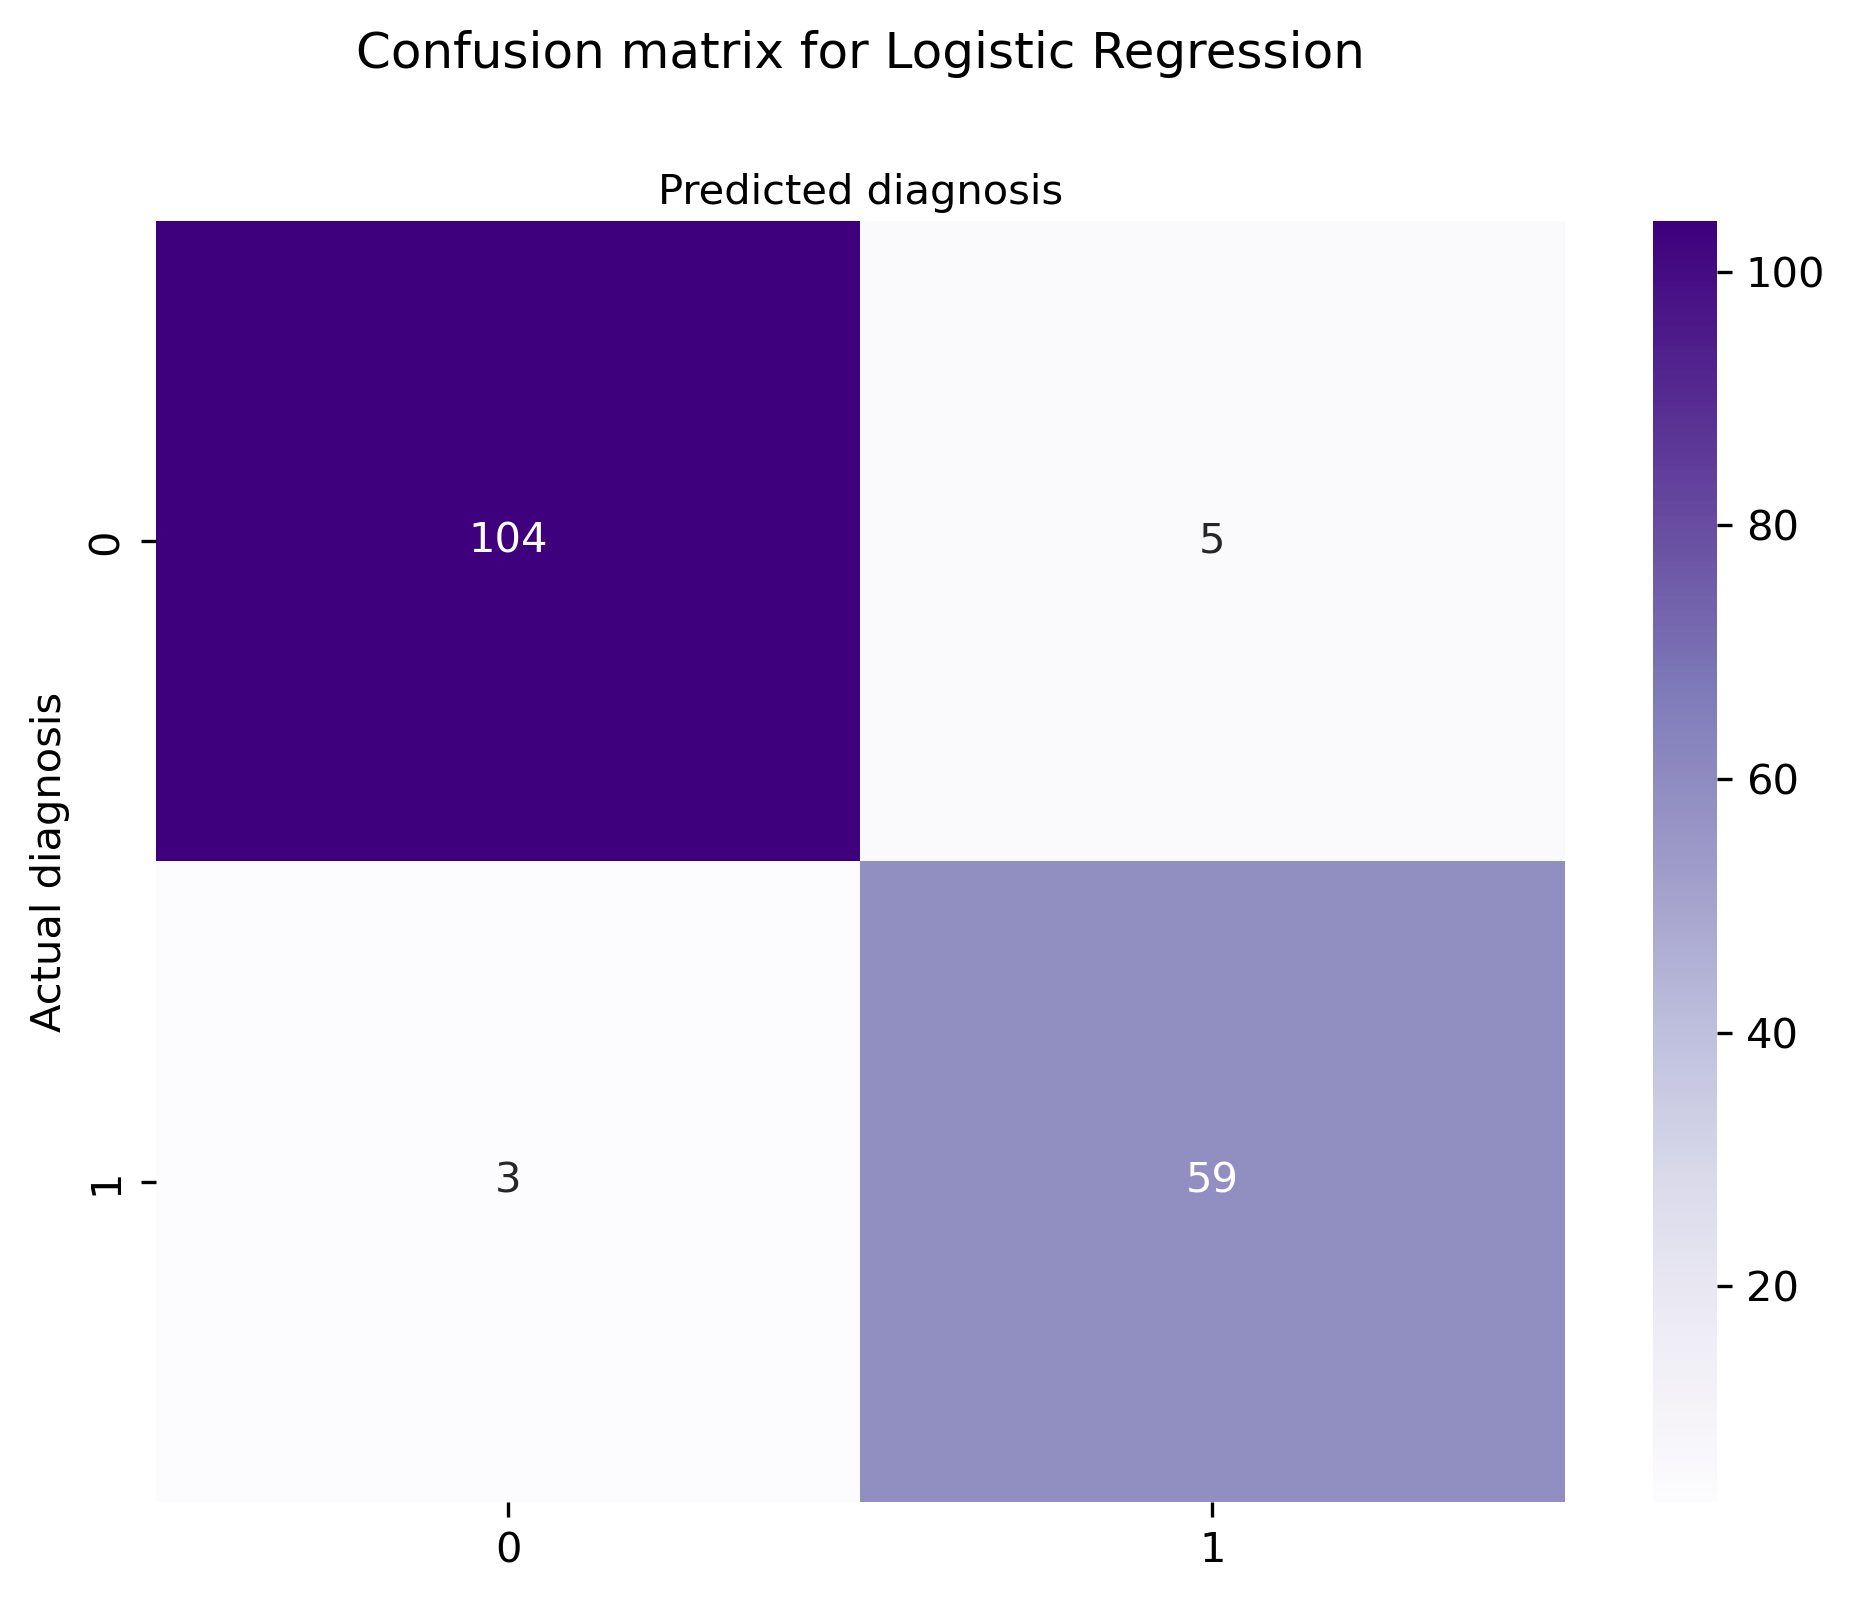

The Accuracy of the Logistic Regression Model is:95.32%


In [15]:
#Confusion Matrix
Name = "Logistic Regression"
confusion(y_test,y_pred,Name)

In [16]:
cross(classifier, X_train, y_train, Name)

Cross Validation Score of Logistic Regression is:
Accuracy: 96.89%
Standard Deviation: 2.89%


## K Nearest Neighbours

In [17]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2 )
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [4 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]

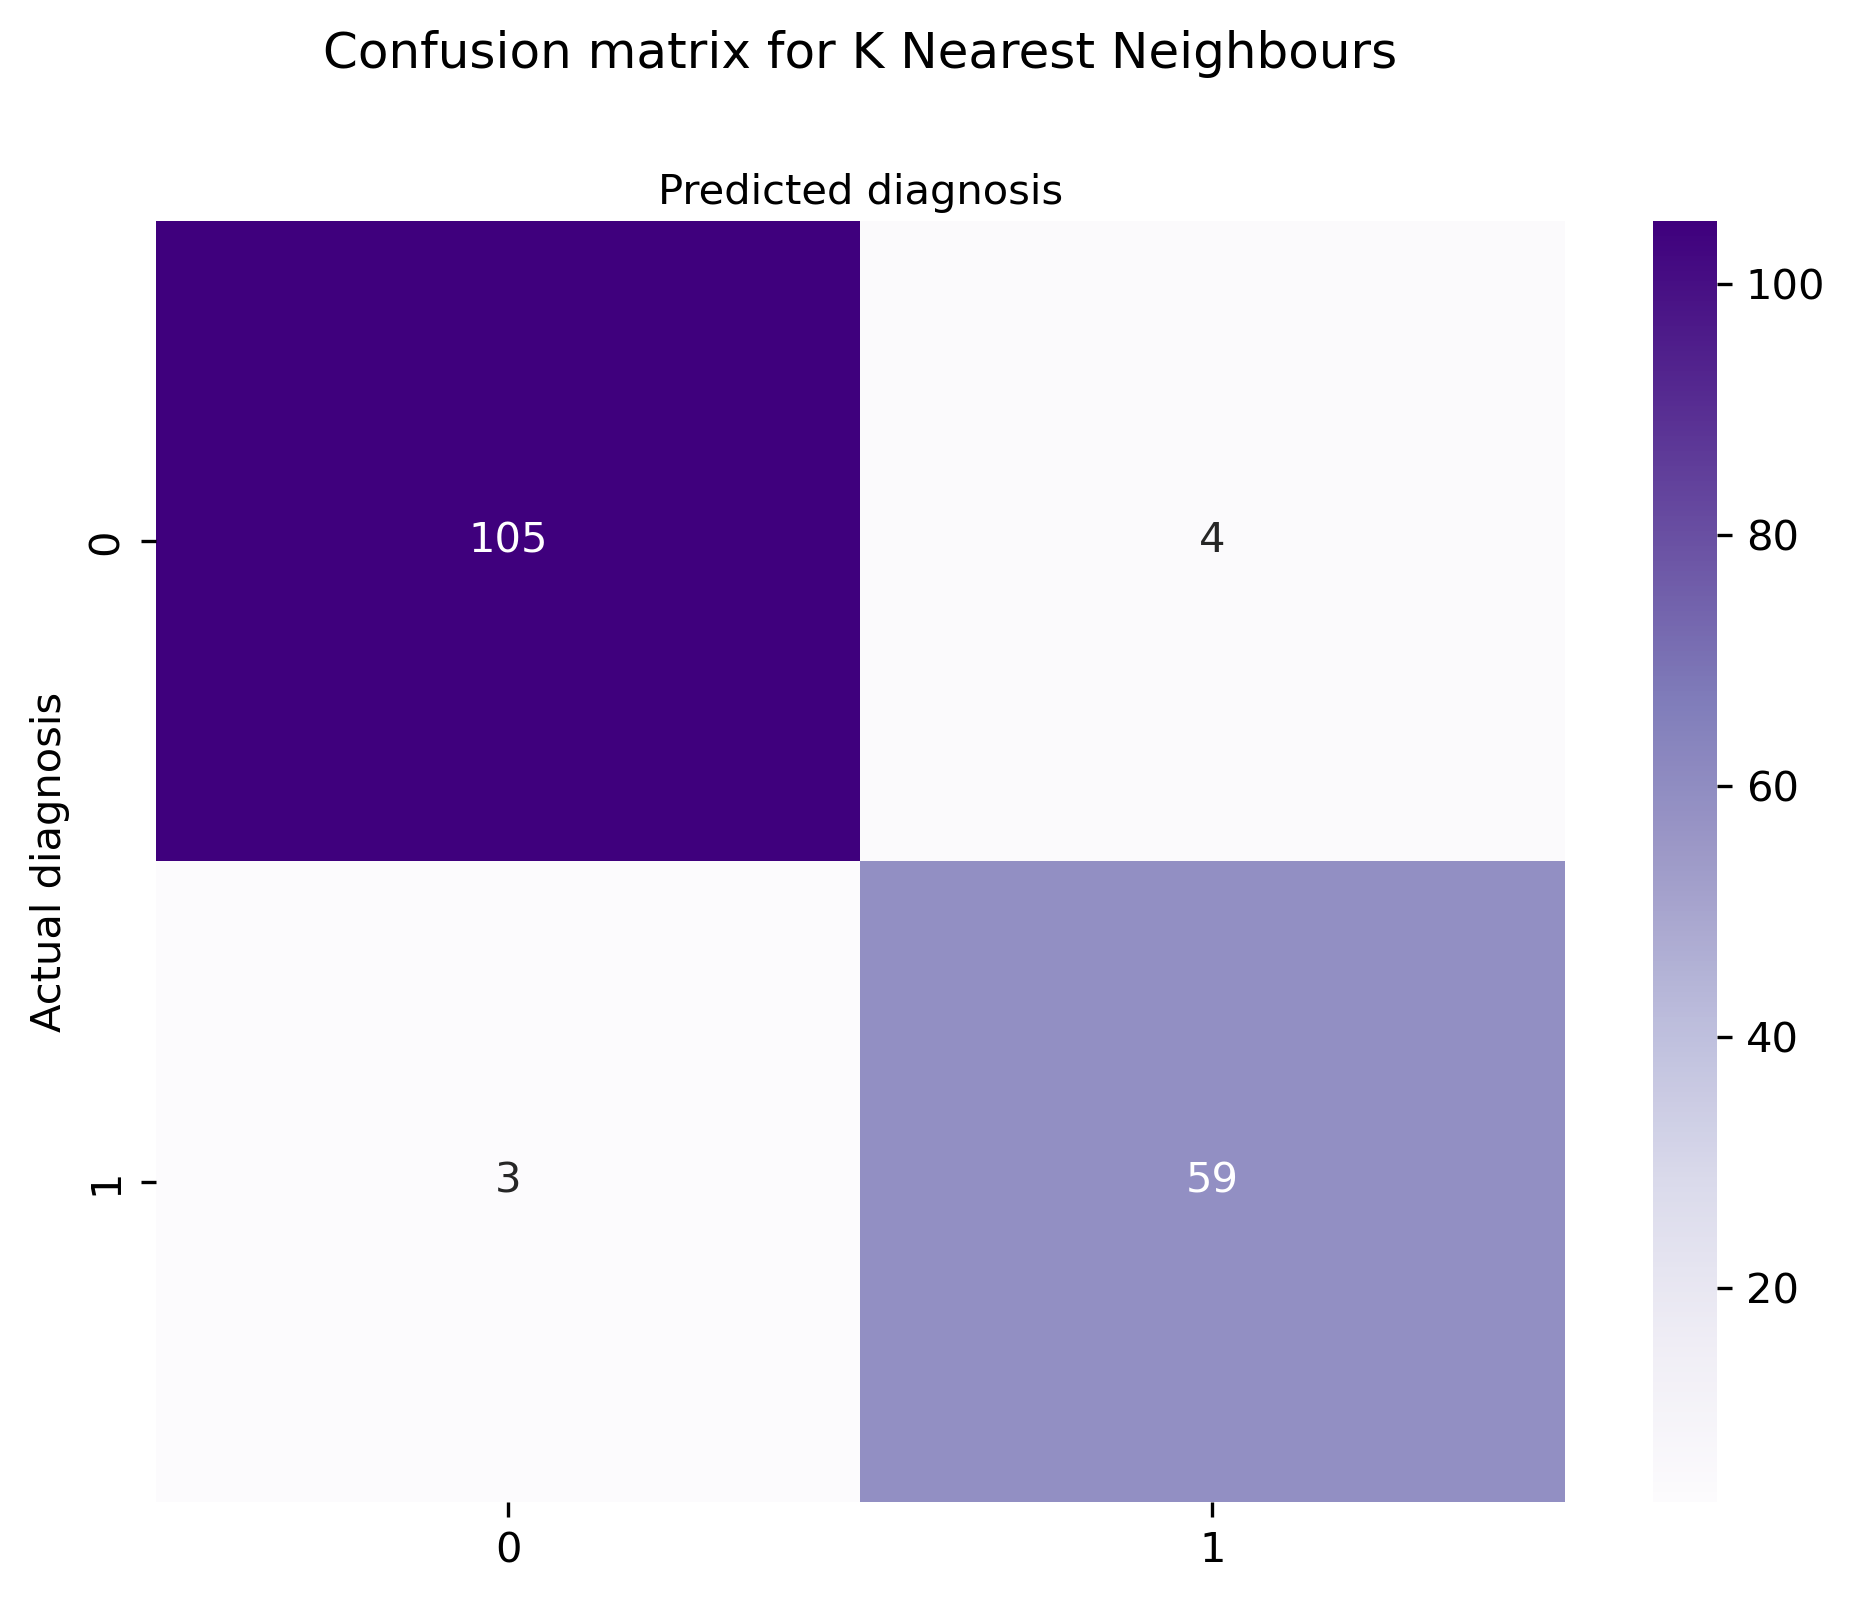

The Accuracy of the K Nearest Neighbours Model is:95.91%


In [19]:
#Confusion Matrix
Name = "K Nearest Neighbours"
confusion(y_test,y_pred,Name)

In [20]:
cross(classifier, X_train, y_train, Name)

Cross Validation Score of K Nearest Neighbours is:
Accuracy: 97.47%
Standard Deviation: 2.46%


## Support Vector Machines

In [21]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [22]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [4 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 4]
 [4 2]
 [4 4]
 [2 2]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]

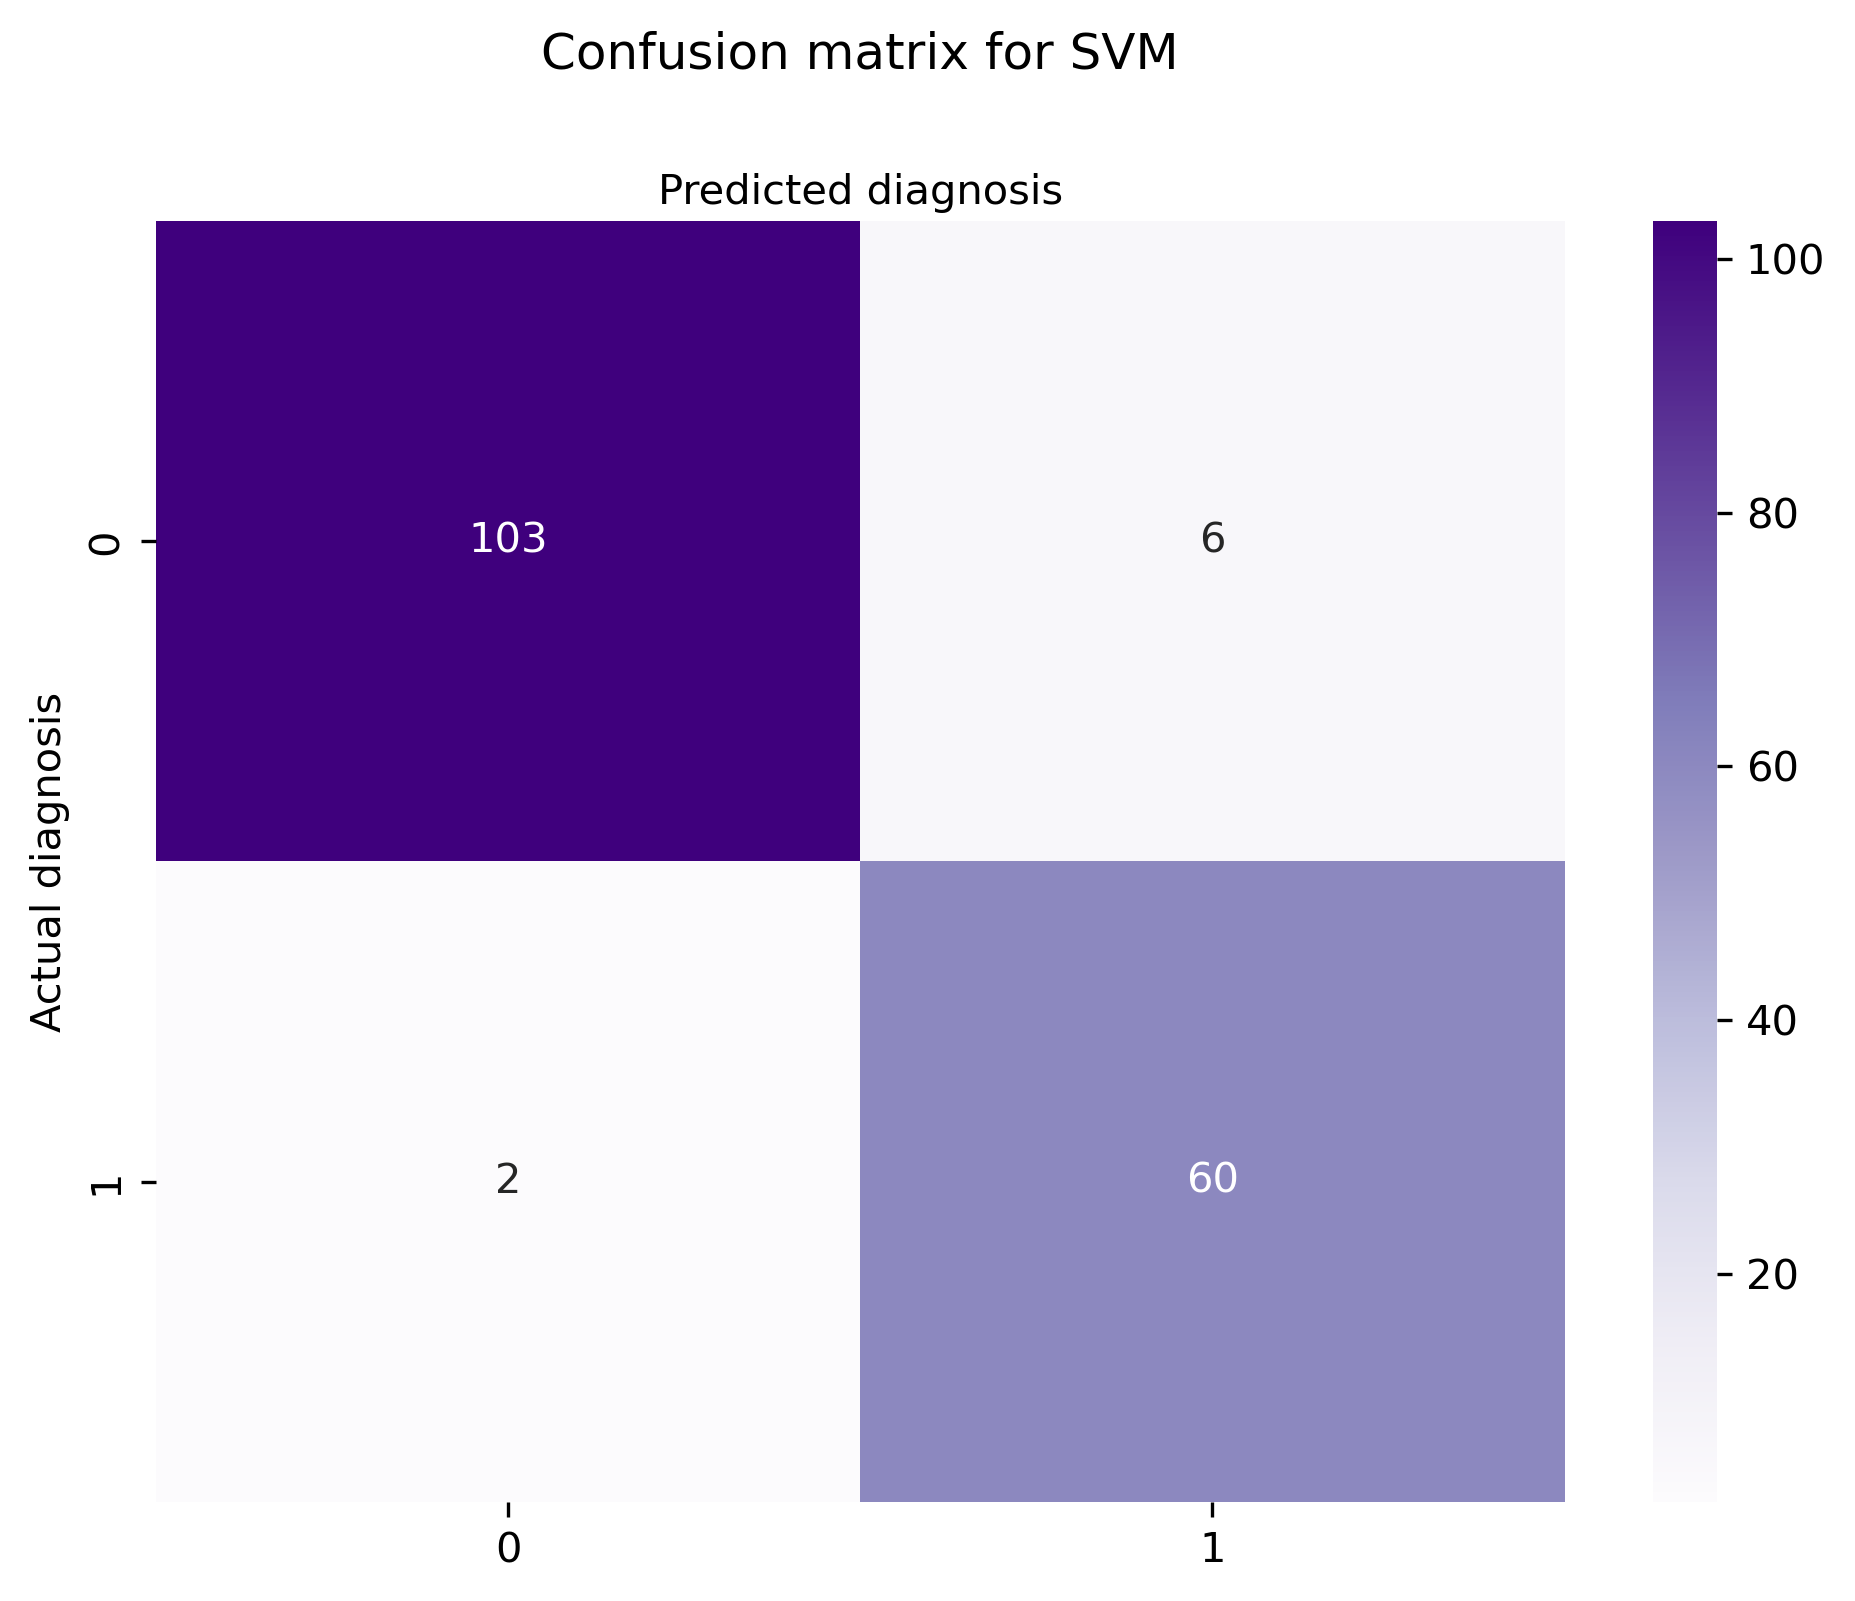

The Accuracy of the SVM Model is:95.32%


In [23]:
#Confusion Matrix
Name = "SVM"
confusion(y_test,y_pred,Name)

In [24]:
cross(classifier, X_train, y_train, Name)

Cross Validation Score of SVM is:
Accuracy: 97.08%
Standard Deviation: 2.33%


## Kernel SVM

In [25]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [26]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [4 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 4]
 [4 2]
 [4 4]
 [2 2]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]

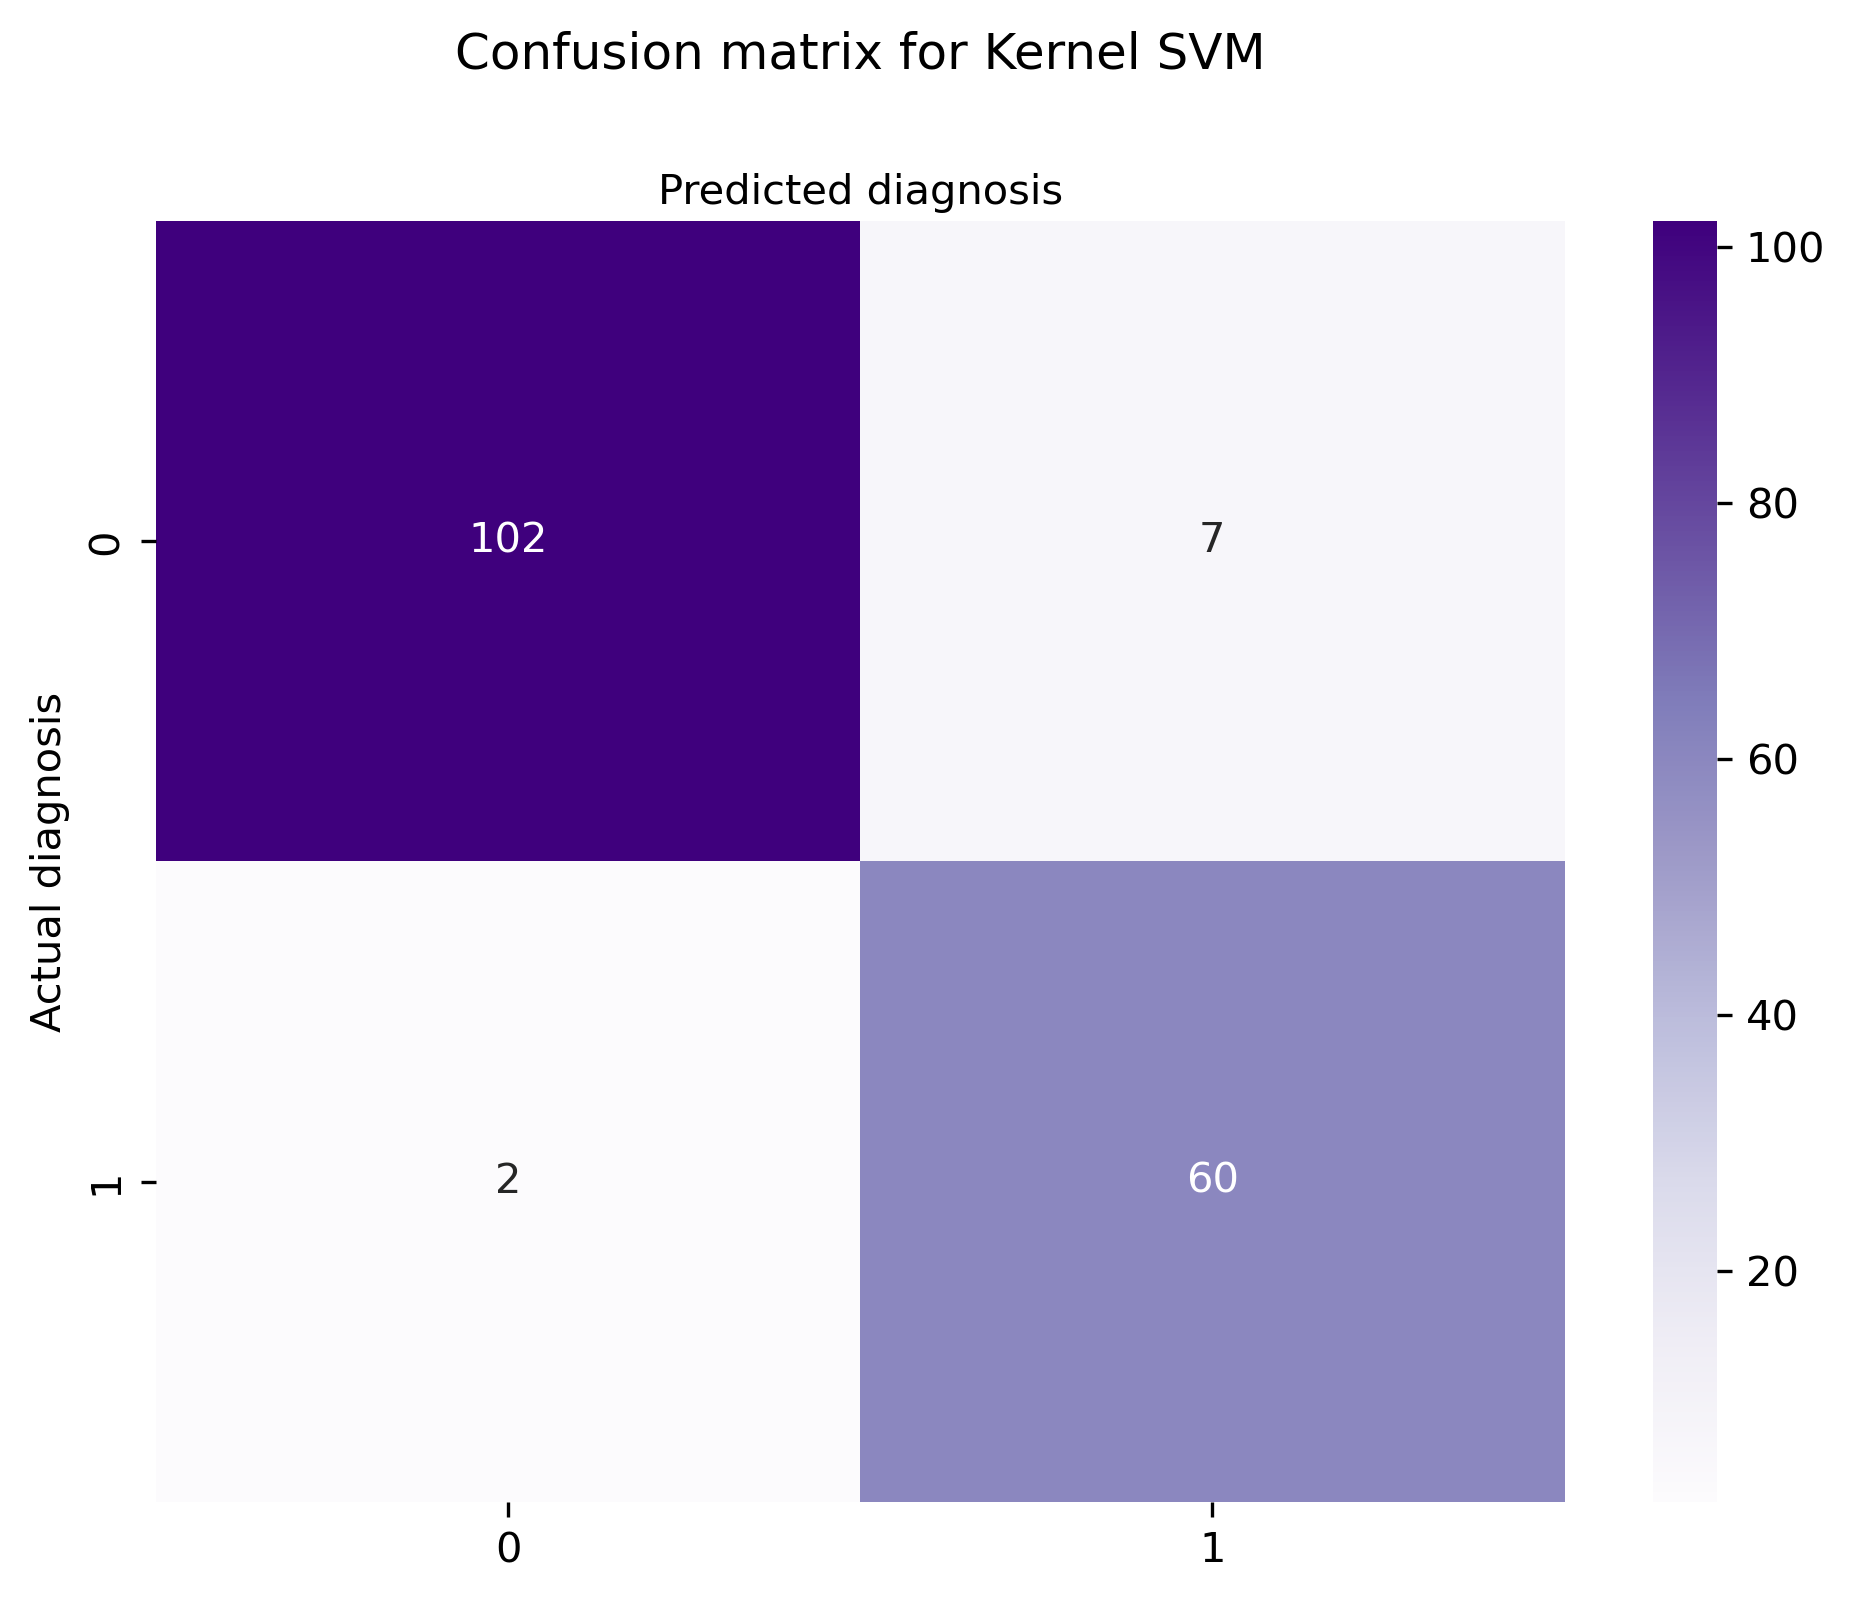

The Accuracy of the Kernel SVM Model is:94.74%


In [27]:
#Confusion Matrix
Name = "Kernel SVM"
confusion(y_test,y_pred,Name)

In [28]:
cross(classifier, X_train, y_train, Name)

Cross Validation Score of Kernel SVM is:
Accuracy: 97.47%
Standard Deviation: 1.93%


## Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [30]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[4 2]
 [4 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 4]
 [4 2]
 [4 4]
 [2 2]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]

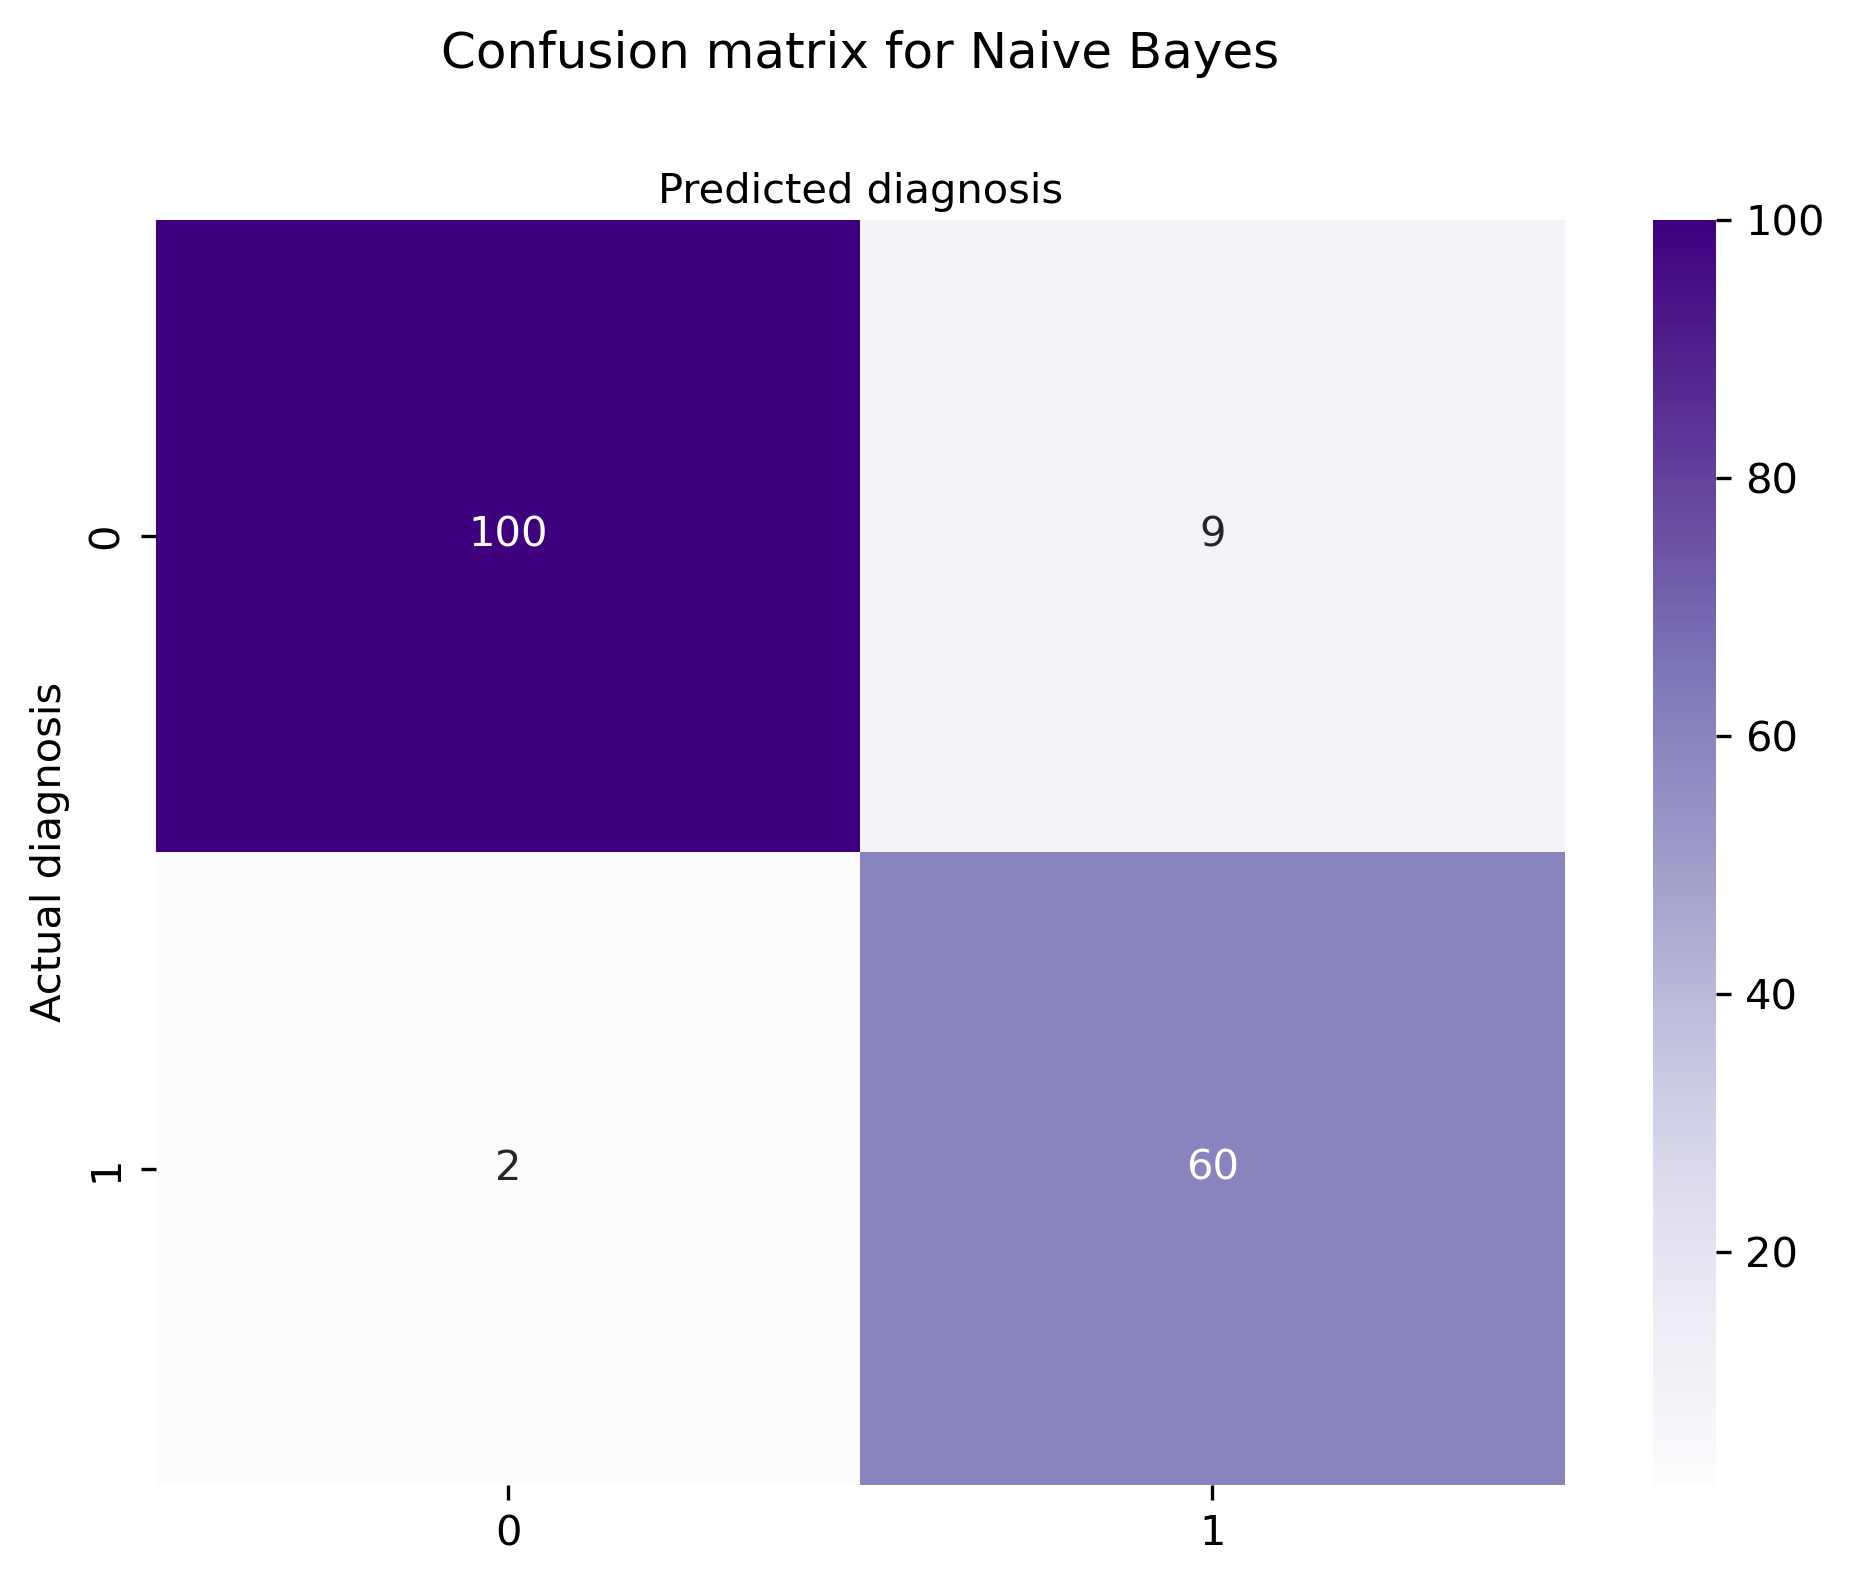

The Accuracy of the Naive Bayes Model is:93.57%


In [31]:
#Confusion Matrix
Name = "Naive Bayes"
confusion(y_test,y_pred,Name)

In [32]:
cross(classifier, X_train, y_train, Name)

Cross Validation Score of Naive Bayes is:
Accuracy: 97.08%
Standard Deviation: 1.98%


## Decision Tree Classification

In [33]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [35]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [4 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 2]
 [4 4]
 [2 2]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 4]
 [2 2]
 [2 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]

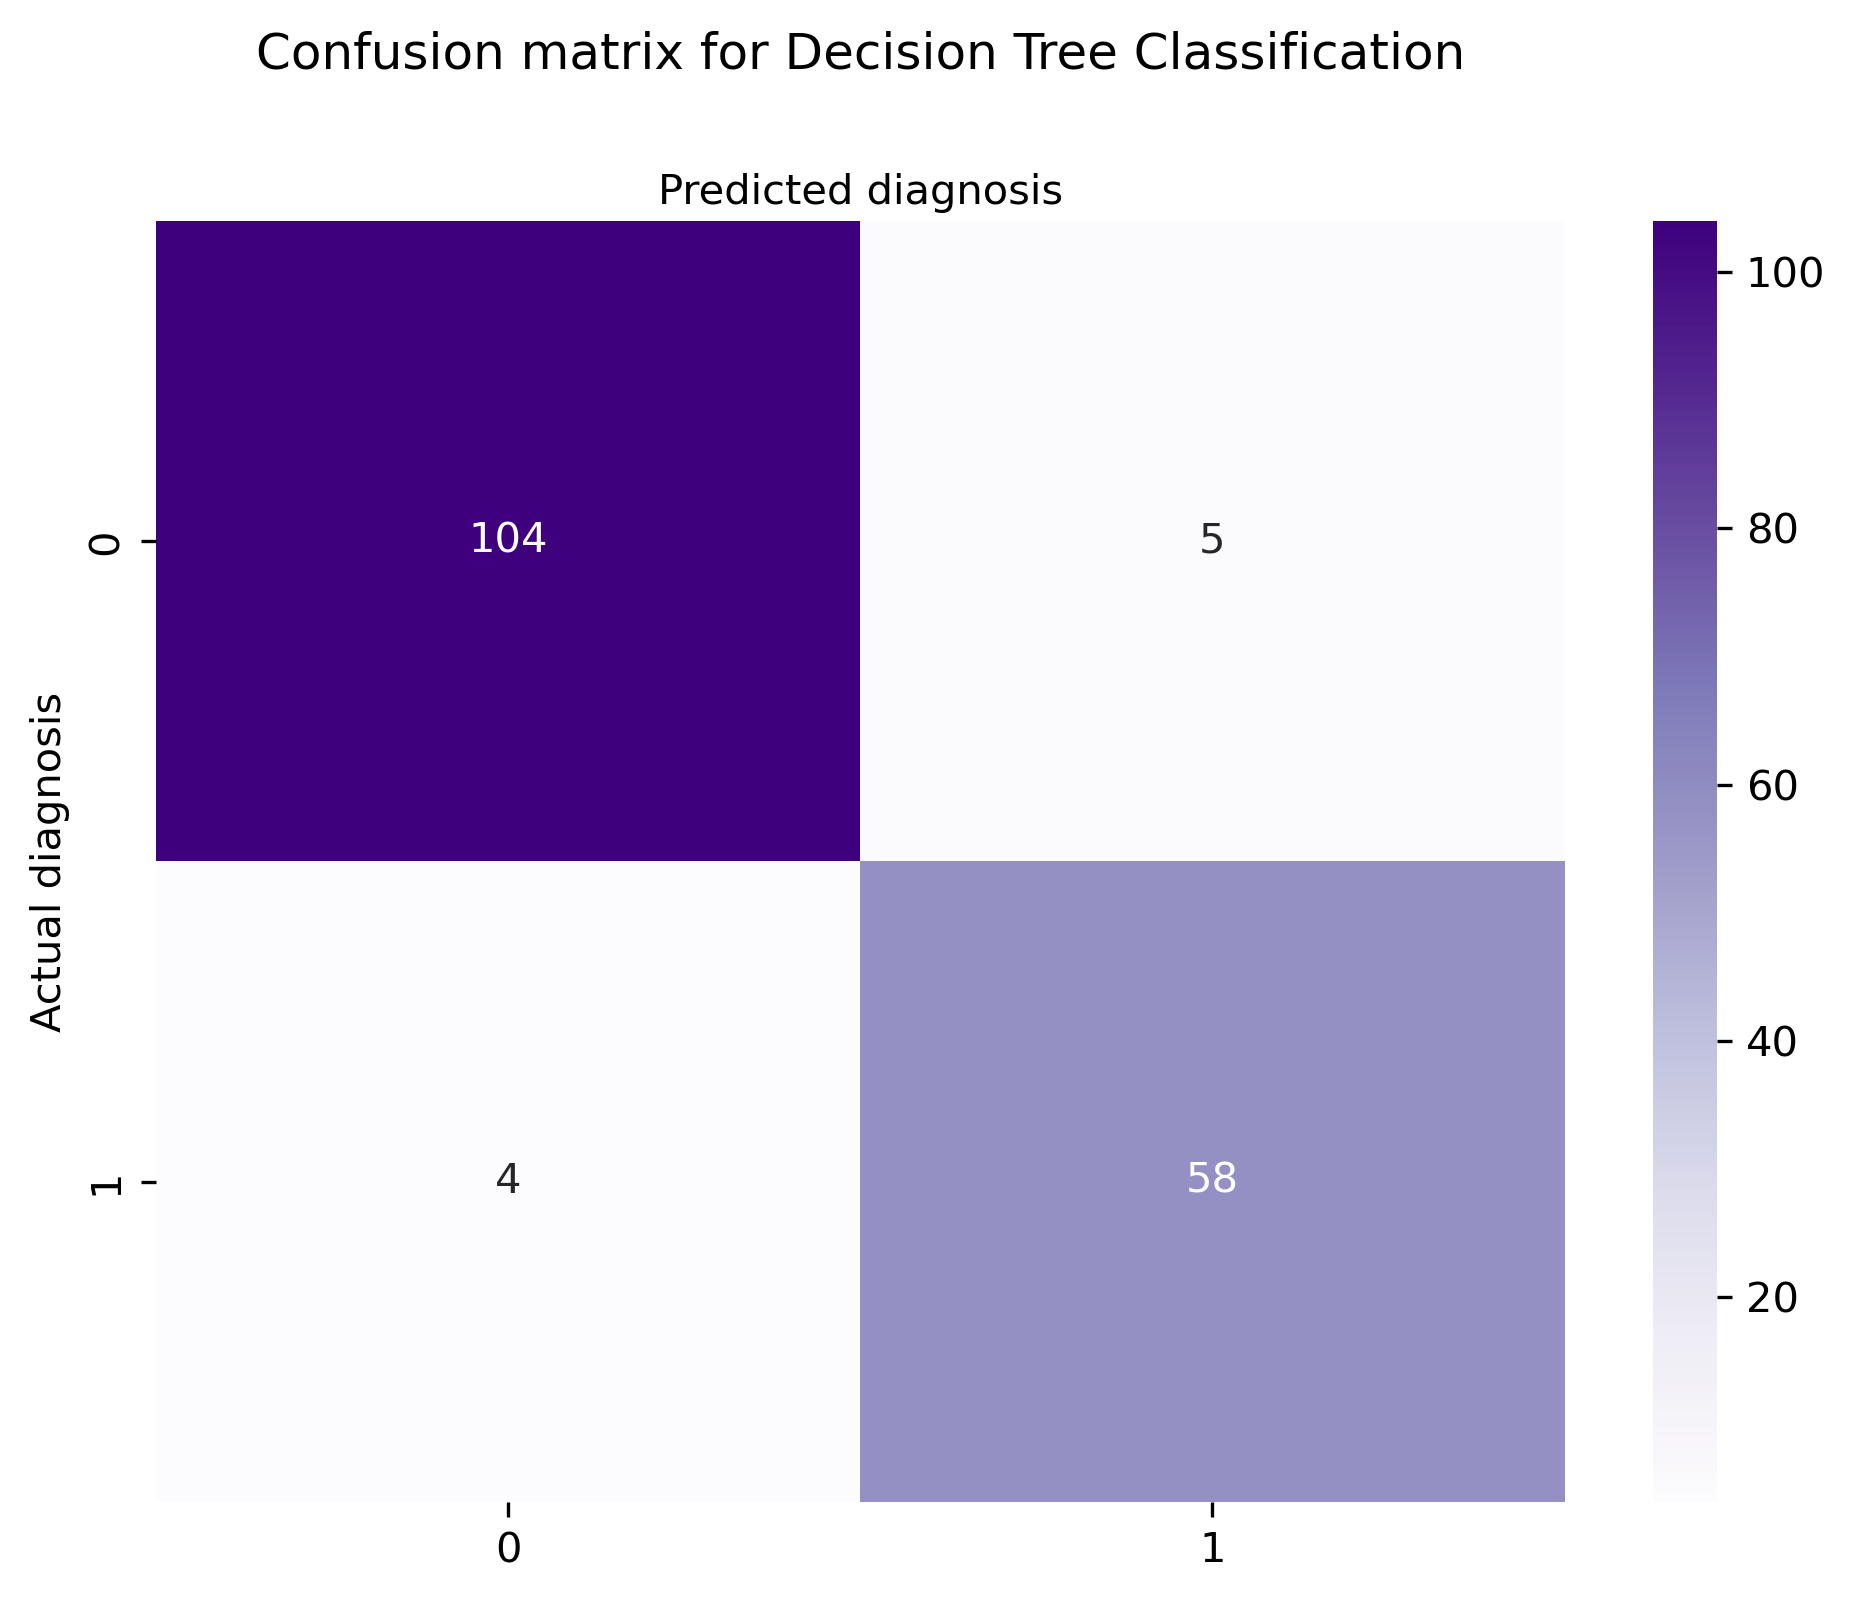

The Accuracy of the Decision Tree Classification Model is:94.74%


In [36]:
#Confusion Matrix
Name = "Decision Tree Classification"
confusion(y_test,y_pred,Name)

In [37]:
cross(classifier, X_train, y_train, Name)

Cross Validation Score of Decision Tree Classification is:
Accuracy: 94.33%
Standard Deviation: 3.96%


## Random Forest Classification Model

In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=20,criterion='entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

In [39]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [4 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 4]
 [4 2]
 [4 4]
 [2 2]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 4]
 [2 2]

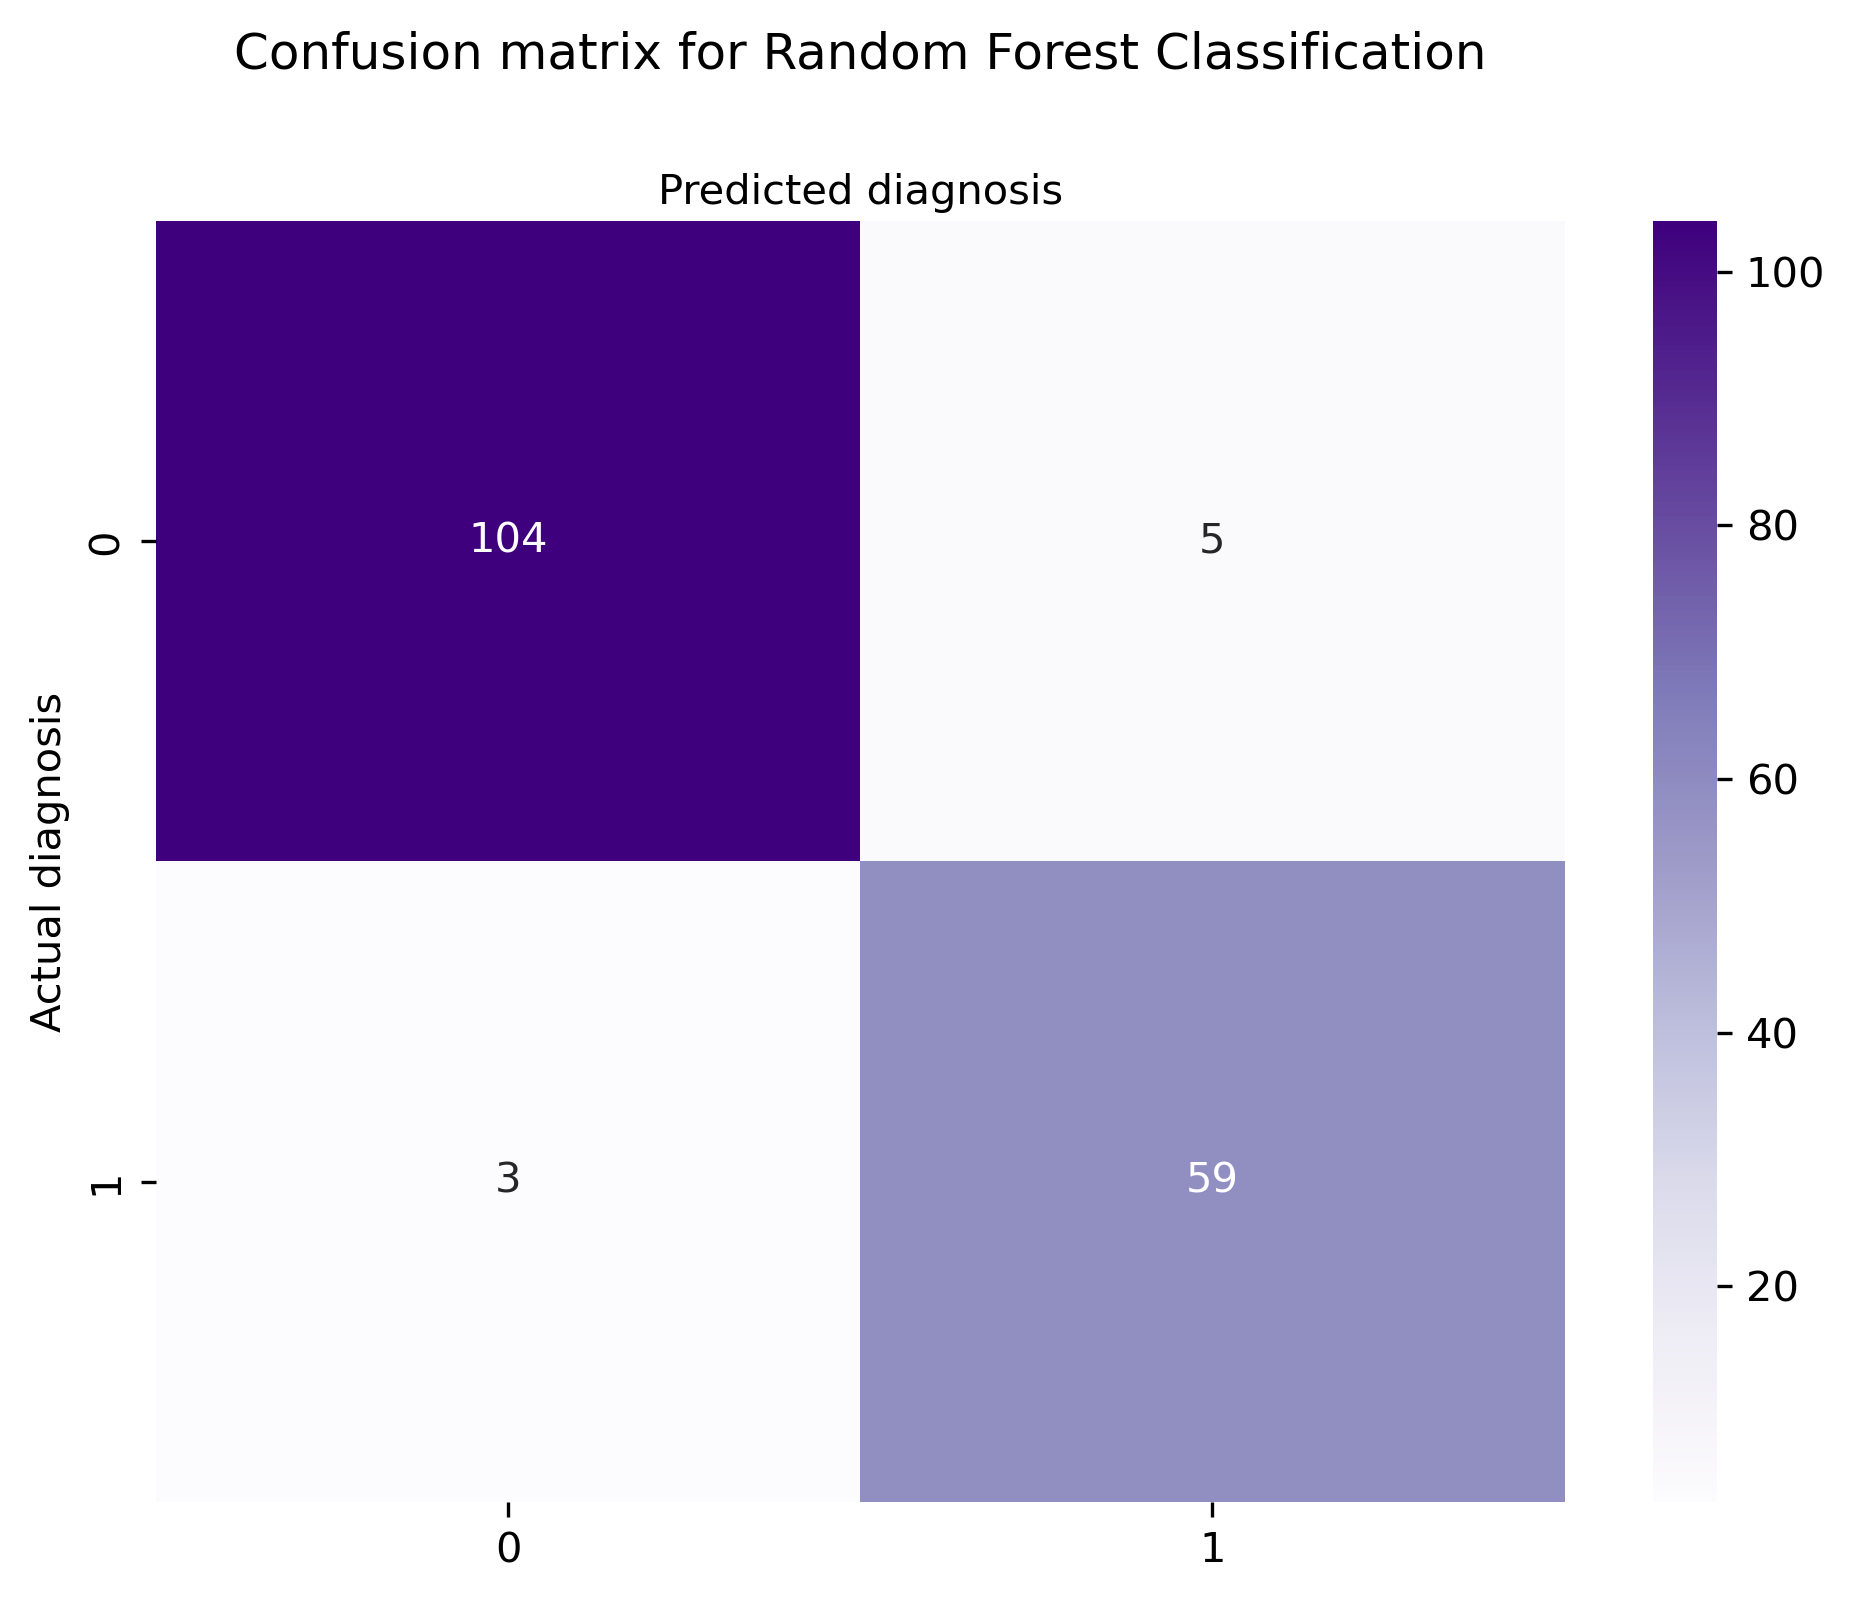

The Accuracy of the Random Forest Classification Model is:95.32%


In [40]:
#Confusion Matrix
Name = "Random Forest Classification"
confusion(y_test,y_pred,Name)

In [41]:
cross(classifier, X_train, y_train, Name)

Cross Validation Score of Random Forest Classification is:
Accuracy: 96.69%
Standard Deviation: 3.99%


# Results

In [42]:
results_df = pd.DataFrame(results)
results_df

,Model,Mean Accuracy,Standard Deviation
0,Logistic Regression,96.885370,2.893570
1,K Nearest Neighbours,97.469834,2.456974
2,SVM,97.077677,2.331601
3,Kernel SVM,97.469834,1.931300
4,Naive Bayes,97.081448,1.976328
5,Decision Tree Classification,94.332579,3.961037
6,Random Forest Classification,96.685520,3.993156


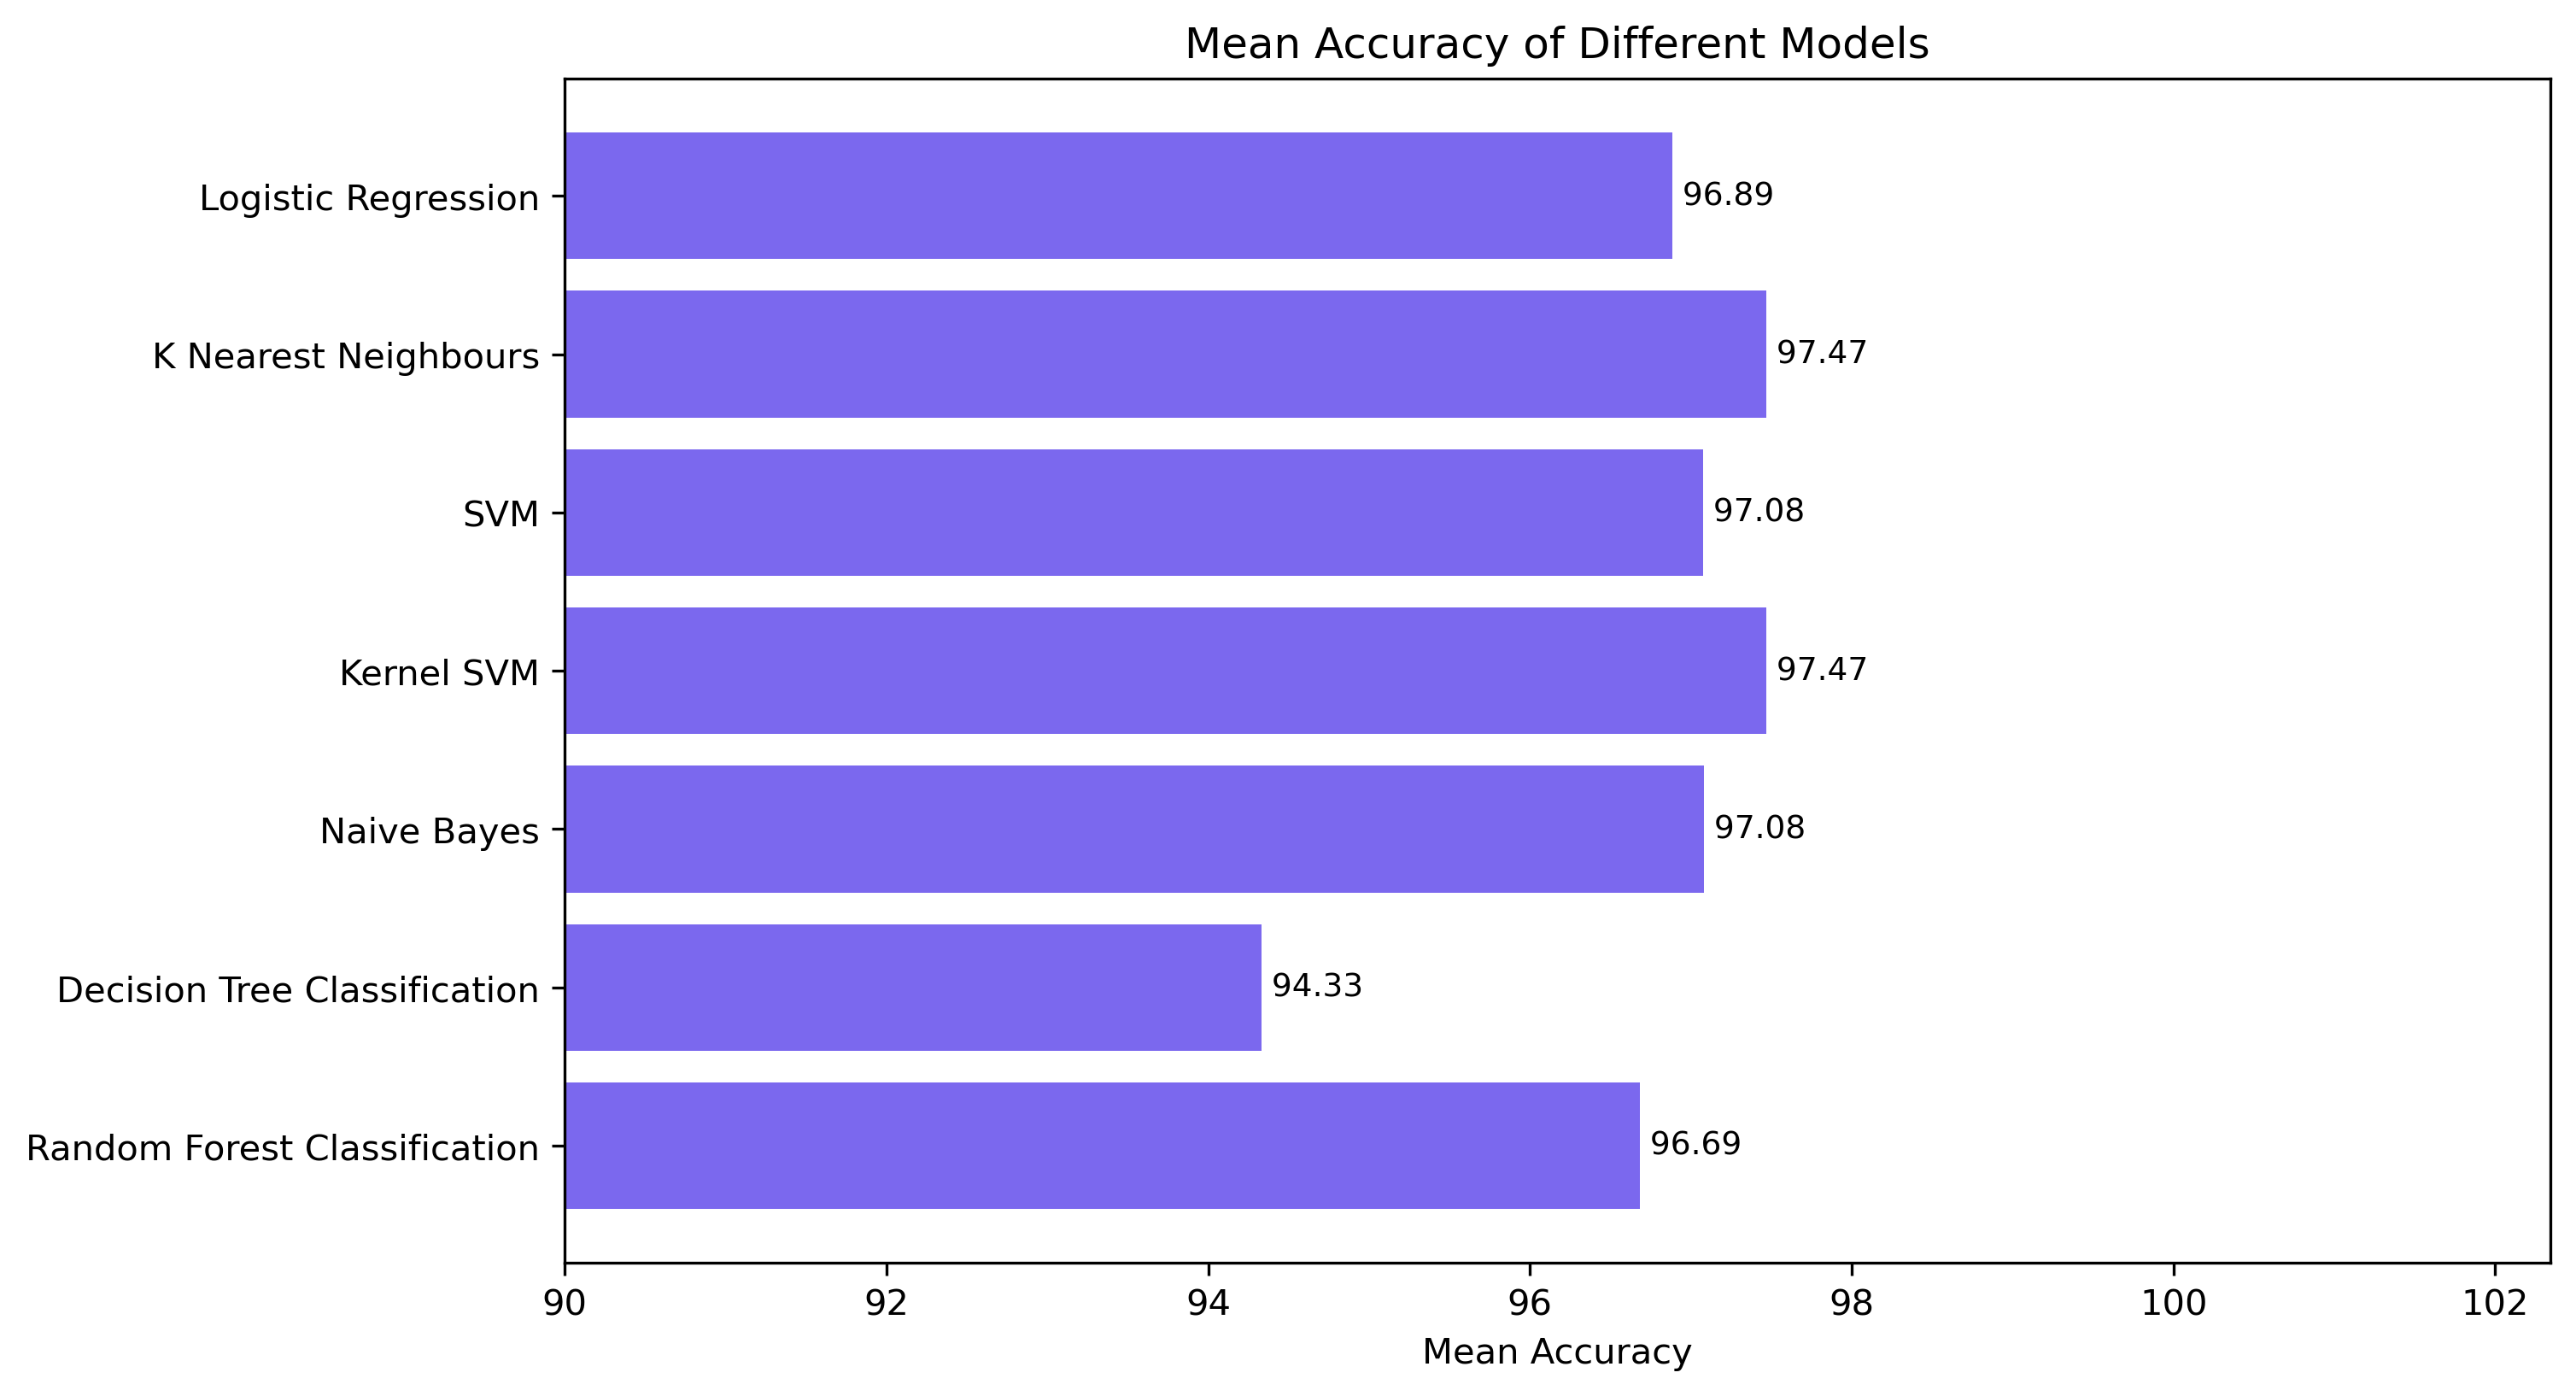

In [43]:
plt.figure(figsize=(10, 6))
plt.barh(results_df['Model'], results_df['Mean Accuracy'], color='MediumSlateBlue')
plt.xlabel('Mean Accuracy')
plt.title('Mean Accuracy of Different Models')
plt.gca().invert_yaxis() 
plt.xlim(90, plt.xlim()[1]) 

for index, row in results_df.iterrows():
    plt.text(row['Mean Accuracy'], index, f' {row["Mean Accuracy"]:.2f}', va='center', ha='left', fontsize=9)

plt.show()

<li><b>Highest Accuracy:</b> The SVM model demonstrates the highest mean accuracy among the listed models, closely followed by Logistic Regression, Kernel SVM, and Random Forest.
<li><b>Consistency:</b> KNN shows relatively lower accuracy than SVM but with a comparatively lower standard deviation, implying a more consistent performance across folds in the cross-validation process.
<li><b>Variance in Performance:</b> Models like Decision Trees and Naive Bayes exhibit lower mean accuracy scores along with moderate to high standard deviations, indicating more variance in performance across different cross-validation folds.
    <li><b>Consideration for Selection:</b> When considering a trade-off between accuracy and consistency, KNN might be a potential choice due to its balanced accuracy and lower variance.